<a href="https://colab.research.google.com/github/shaina-12/Artificial-Intelligence/blob/main/Deep%20Learning/Transfer_Learning_Using_Inception_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import torch
from torch.utils.data import Dataset
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as da
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
%matplotlib inline

In [32]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(299),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), # ToTensor : [0, 255] -> [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(), # ToTensor : [0, 255] -> [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [33]:
train_data = CIFAR10('data', train=True,transform=train_transform, download=True)

Files already downloaded and verified


In [34]:
test_data = CIFAR10('data', train=False,transform=test_transform, download=True)

Files already downloaded and verified


In [35]:
batch_size = 100

train_loader = DataLoader(train_data,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(test_data, 
                         batch_size=batch_size,
                         shuffle=True)

In [36]:
import torchvision.utils
def imshow(img, title):
    img = torchvision.utils.make_grid(img, normalize=True)
    npimg = img.numpy()
    fig = plt.figure(figsize = (20, 20))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

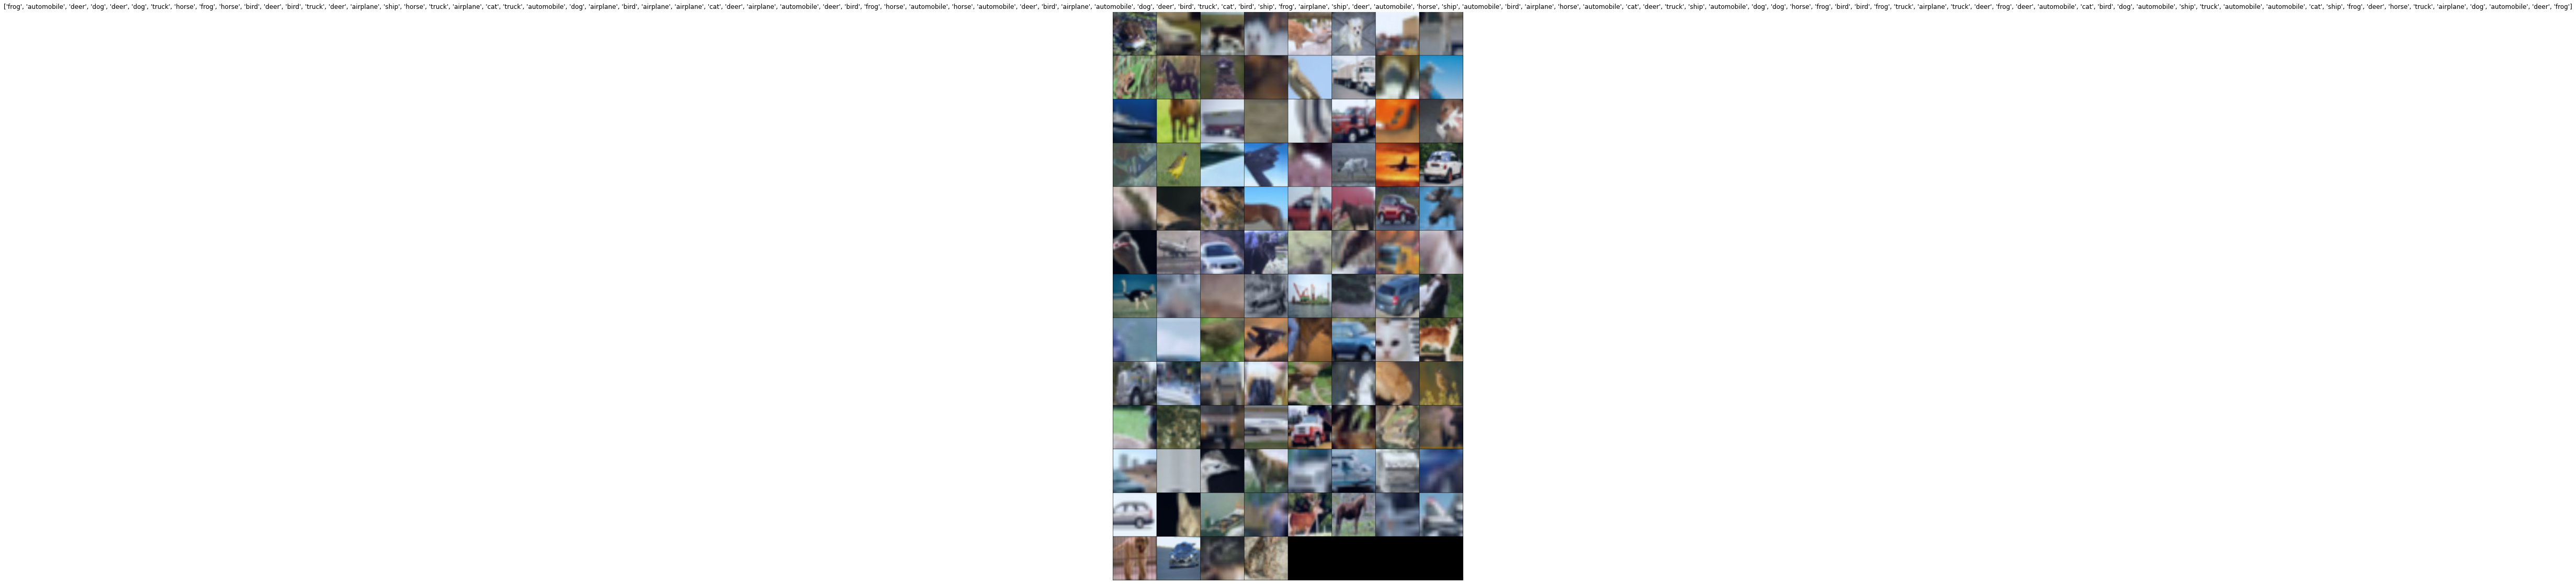

In [37]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(images, [train_data.classes[i] for i in labels])

In [38]:
from torchvision import models
model = models.inception_v3(pretrained=True)

In [39]:
model

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [40]:
model.aux_logits = False

for parameter in model.parameters():
    parameter.requires_grad = False

In [41]:
model.fc = nn.Linear(model.fc.in_features, 10)

In [42]:
model = model.cuda()

In [43]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

In [29]:
num_epochs = 30
for epoch in range(num_epochs):
    
    total_batch = len(train_data)//batch_size

    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images.cuda()
        Y = batch_labels.cuda()

        pre = model(X)
        cost = loss(pre, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if (i+1) % 5 == 0:
            print('Epoch [%d/%d], lter [%d/%d] Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))

Epoch [1/30], lter [5/500] Loss: 4.8128
Epoch [1/30], lter [10/500] Loss: 2.2138
Epoch [1/30], lter [15/500] Loss: 2.0565
Epoch [1/30], lter [20/500] Loss: 1.9575
Epoch [1/30], lter [25/500] Loss: 1.9257
Epoch [1/30], lter [30/500] Loss: 1.8688
Epoch [1/30], lter [35/500] Loss: 1.9472
Epoch [1/30], lter [40/500] Loss: 1.7927
Epoch [1/30], lter [45/500] Loss: 1.6970
Epoch [1/30], lter [50/500] Loss: 1.7363
Epoch [1/30], lter [55/500] Loss: 1.9457
Epoch [1/30], lter [60/500] Loss: 1.8572
Epoch [1/30], lter [65/500] Loss: 1.7623
Epoch [1/30], lter [70/500] Loss: 1.8642
Epoch [1/30], lter [75/500] Loss: 1.8516
Epoch [1/30], lter [80/500] Loss: 1.7496
Epoch [1/30], lter [85/500] Loss: 1.6587
Epoch [1/30], lter [90/500] Loss: 1.7219
Epoch [1/30], lter [95/500] Loss: 1.6174
Epoch [1/30], lter [100/500] Loss: 1.7145
Epoch [1/30], lter [105/500] Loss: 1.3833
Epoch [1/30], lter [110/500] Loss: 1.7169
Epoch [1/30], lter [115/500] Loss: 1.6859
Epoch [1/30], lter [120/500] Loss: 1.6500
Epoch [1/30]

In [30]:
model.eval()

correct = 0
total = 0

for images, labels in test_loader:
    
    images = images.cuda()
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels.cuda()).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 68.720000 %
